In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#importing dataset
loan=pd.read_csv("C:/Users/lenovo/Documents/loan.csv")
loan

,age,gender,education,income,experience,home_ownership,loan_amount,loan_intent,loan_int_rate,loan_percent_income,credit_score,pending_loan,loan_status
0,22,female,Master,71948,0,RENT,35000,PERSONAL,16.02,0.49,561,No,1
1,23,female,Bachelor,79753,0,RENT,35000,MEDICAL,15.23,0.44,675,No,1
2,24,male,Master,66135,1,RENT,35000,MEDICAL,14.27,0.53,586,No,1
3,26,female,Bachelor,93471,1,RENT,35000,EDUCATION,12.42,0.37,701,No,1
4,24,female,High School,95550,5,RENT,35000,MEDICAL,11.11,0.37,585,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18709,31,male,Master,136832,9,RENT,12319,PERSONAL,16.92,0.09,722,No,1
18710,24,male,High School,37786,0,MORTGAGE,13500,EDUCATION,13.43,0.36,612,No,1
18711,24,female,Associate,31924,2,RENT,12229,MEDICAL,10.70,0.38,678,No,1
18712,27,male,Associate,47971,6,RENT,15000,MEDICAL,15.66,0.31,645,No,1


In [3]:
loan[loan.columns].dtypes

age                      int64
gender                  object
education               object
income                   int64
experience               int64
home_ownership          object
loan_amount              int64
loan_intent             object
loan_int_rate          float64
loan_percent_income    float64
credit_score             int64
pending_loan            object
loan_status              int64
dtype: object

In [4]:
#statistical summary
loan.describe()

,age,income,experience,loan_amount,loan_int_rate,loan_percent_income,credit_score,loan_status
count,18714.000000,1.871400e+04,18714.000000,18714.000000,18714.000000,18714.000000,18714.000000,18714.000000
mean,27.764775,9.695878e+04,5.374693,15422.484664,11.362330,0.193045,632.550711,0.260821
std,5.330405,6.663023e+04,5.393225,5388.855761,2.986452,0.087373,50.285091,0.439094
min,20.000000,2.136100e+04,0.000000,10000.000000,5.420000,0.010000,418.000000,0.000000
25%,24.000000,6.059850e+04,1.000000,11200.000000,9.380000,0.130000,601.000000,0.000000
50%,26.000000,8.282900e+04,4.000000,14000.000000,11.010000,0.180000,640.000000,0.000000
75%,30.000000,1.147602e+05,8.000000,18250.000000,13.350000,0.250000,670.000000,1.000000
max,49.000000,1.741243e+06,31.000000,35000.000000,20.000000,0.660000,805.000000,1.000000


In [5]:
#information about the dataset
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18714 entries, 0 to 18713
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  18714 non-null  int64  
 1   gender               18714 non-null  object 
 2   education            18714 non-null  object 
 3   income               18714 non-null  int64  
 4   experience           18714 non-null  int64  
 5   home_ownership       18714 non-null  object 
 6   loan_amount          18714 non-null  int64  
 7   loan_intent          18714 non-null  object 
 8   loan_int_rate        18714 non-null  float64
 9   loan_percent_income  18714 non-null  float64
 10  credit_score         18714 non-null  int64  
 11  pending_loan         18714 non-null  object 
 12  loan_status          18714 non-null  int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 1.9+ MB


In [6]:
#shape
loan.shape

(18714, 13)

In [7]:
#categorical variables
loan.select_dtypes(include=['object', 'category']).columns

Index(['gender', 'education', 'home_ownership', 'loan_intent', 'pending_loan'], dtype='object')

In [8]:
#continuous variables
loan.select_dtypes(include=['int', 'float']).columns

Index(['age', 'income', 'experience', 'loan_amount', 'loan_int_rate',
       'loan_percent_income', 'credit_score', 'loan_status'],
      dtype='object')

In [9]:
#male applicants
male=loan.gender[loan.gender=="male"].count()
male

10388

In [10]:
#female applicants
female=loan.gender[loan.gender=="female"].count()
female

8326

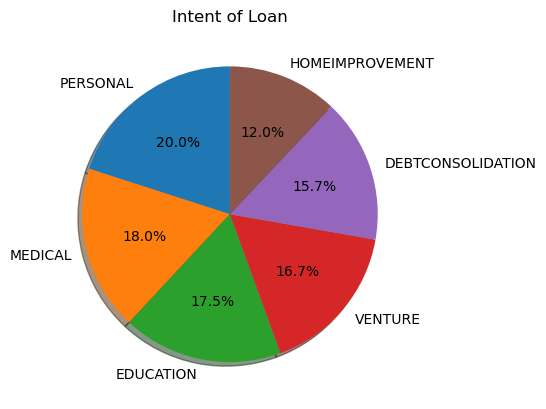

In [11]:
#pie chart for loan purpose
intent_values=loan.loan_intent.value_counts()
intent=loan.loan_intent.unique()
plt.pie(intent_values,startangle=90,labels=intent,autopct='%1.1f%%',shadow=True)
plt.title('Intent of Loan')
plt.savefig('intent')
plt.show()

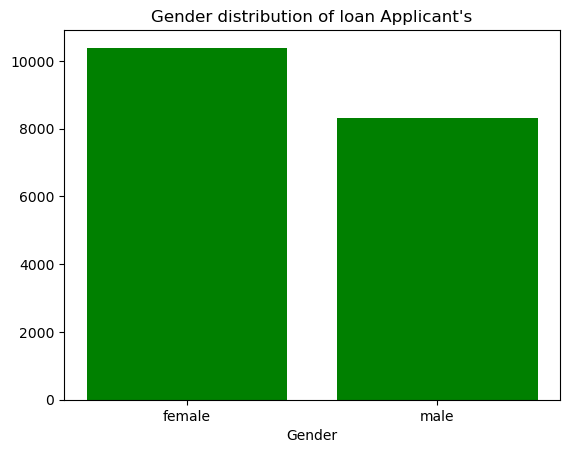

In [12]:
#Gender distribution of loan applicant's
gender_counts=loan.gender.value_counts()
gender=loan.gender.unique()
plt.bar(gender,gender_counts,color='green')
plt.xlabel("Gender")
plt.title("Gender distribution of loan Applicant's")
plt.savefig('Barplot')
plt.show()

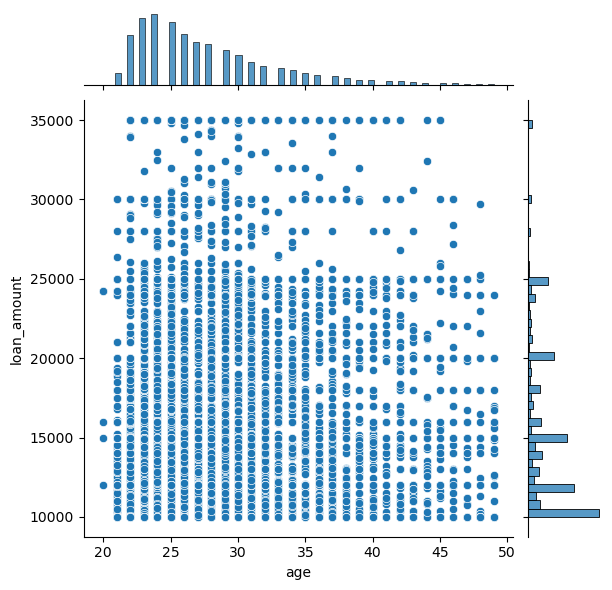

In [13]:
#Jointplot for Age Vs Loan_amount
sns.jointplot(x=loan.age,y=loan.loan_amount)
plt.savefig('jointplot')
plt.show()


In [14]:
#Label encoding
from sklearn.preprocessing import LabelEncoder
# categorical to continuous
label_encoders = {}
for column in loan.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    loan[column] = le.fit_transform(loan[column])
    label_encoders[column] = le

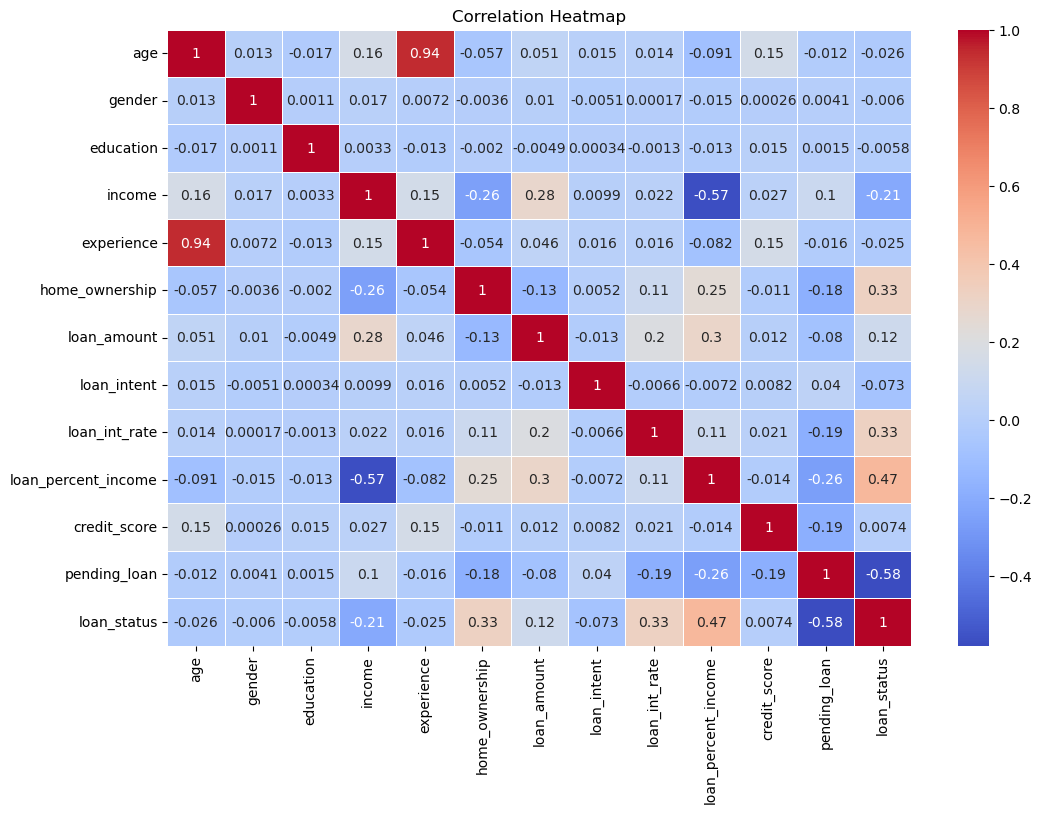

In [15]:
#correlation analysis
correlation = loan.corr()

# Heatmap
plt.figure(figsize=(12,8))
sns.heatmap(correlation, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.savefig('heatmap.png')
plt.show()

In [16]:
#NA values in the dataset
loan.isna().sum()

age                    0
gender                 0
education              0
income                 0
experience             0
home_ownership         0
loan_amount            0
loan_intent            0
loan_int_rate          0
loan_percent_income    0
credit_score           0
pending_loan           0
loan_status            0
dtype: int64

In [17]:
#Duplicated values in the dataset
loan.duplicated().sum()

0

In [18]:
# Calculate Q1, Q3, and IQR
Q1 = loan.quantile(0.25)
Q3 = loan.quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the data to remove outliers
loan_filtered = loan[(loan >= lower_bound) & (loan <= upper_bound)]

#Comparing with original Dataset
print("Original dataset size:", loan.shape)
print("Filtered dataset size:", loan_filtered.shape)

Original dataset size: (18714, 13)
Filtered dataset size: (18714, 13)


In [19]:
from sklearn.model_selection import train_test_split

# Splitting features (X) and target (y)
X = loan.drop('loan_status', axis=1)  
y = loan['loan_status']              

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the sizes of each split
print("Training data size:", X_train.shape, y_train.shape)
print("Test data size:", X_test.shape, y_test.shape)

Training data size: (14971, 12) (14971,)
Test data size: (3743, 12) (3743,)


In [20]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
# Initialize and train the Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions
y_pred = dt_model.predict(X_test)

In [21]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))

Accuracy: 0.9024846379909164
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.93      0.93      2781
           1       0.80      0.83      0.81       962

    accuracy                           0.90      3743
   macro avg       0.87      0.88      0.87      3743
weighted avg       0.90      0.90      0.90      3743

Confusion Matrix:
 [[2581  200]
 [ 165  797]]


In [22]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy of the Decision Tree Model: {accuracy * 100:.2f}%")


Accuracy of the Decision Tree Model: 90.25%


In [23]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)



In [24]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print(f"\nAccuracy of the Random Forest Model: {accuracy * 100:.2f}%")


Accuracy of the Random Forest Model: 93.75%


In [25]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))

Accuracy: 0.9374833021640395
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96      2781
           1       0.91      0.84      0.87       962

    accuracy                           0.94      3743
   macro avg       0.93      0.90      0.92      3743
weighted avg       0.94      0.94      0.94      3743

Confusion Matrix:
 [[2703   78]
 [ 156  806]]
